In [1]:
import re
import csv
import os
training_data_file_path = "./Rockpool-MNIST-training.ipynb.txt"
training_data_file = "../data/Rockpool-MNIST-training.csv"
training_data = []


In [2]:
def check_file_exists( filepath ):
    if ( os.path.exists( filepath ) and os.path.isfile(filepath) ):
        return True
    return False

In [3]:
if ( check_file_exists( training_data_file_path ) and not check_file_exists( training_data_file ) ):
    f = open( training_data_file_path, 'r' )
    lines = f.readlines()
    epoch_iteration_match = re.compile("Epoch\s+(\d+)\s+Iteration:\s+(\d+)\s+")
    loss_match = re.compile("tensor\(([0-9\.]+),\s+")
    success_match = re.compile(".*:\s*([0-9\.]+)\%$")
    data = {
        "Epoch": 0,
        "Iteration": 0,
        "Loss": .0,
        "Success": .0
    }

    for line in lines:
        match = None

        match = epoch_iteration_match.match(line)
        if match is not None:
            epoch, iteration = match.groups()
            data = {
                "Epoch": epoch,
                "Iteration": iteration,
                "Loss": .0,
                "Success": .0
            }

        match = None
        match = loss_match.match(line)
        if match is not None:
            lossvalue = float(match.group(1))
            data["Loss"] = lossvalue
        
        match = None
        match = success_match.match(line)
        if match is not None:
            success = float(match.group(1))/100
            data["Success"] = success
            training_data.append(data)


In [4]:
if ( not check_file_exists( training_data_file ) ):
    with open(training_data_file, 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, quoting=csv.QUOTE_ALL) 
        spamwriter.writerow(['Epoch', 'Iteration', 'Loss', 'Success'])
        for td in training_data:
            spamwriter.writerow(td.values())
else:
    with open(training_data_file, 'r', newline='') as csvfile:
        spamreader = csv.reader(csvfile, quoting=csv.QUOTE_ALL) 
        header = next(spamreader)
        for row in spamreader:
            data = {
                header[0]: row[0],
                header[1]: row[1],
                header[2]: row[2],
                header[3]: row[3],
            }
            training_data.append(data)

In [5]:
losses = []
success = []
for data in training_data:
    losses.append(float(data['Loss']))
    success.append(float(data['Success']))

In [6]:
from matplotlib import pyplot as plt
import numpy as np

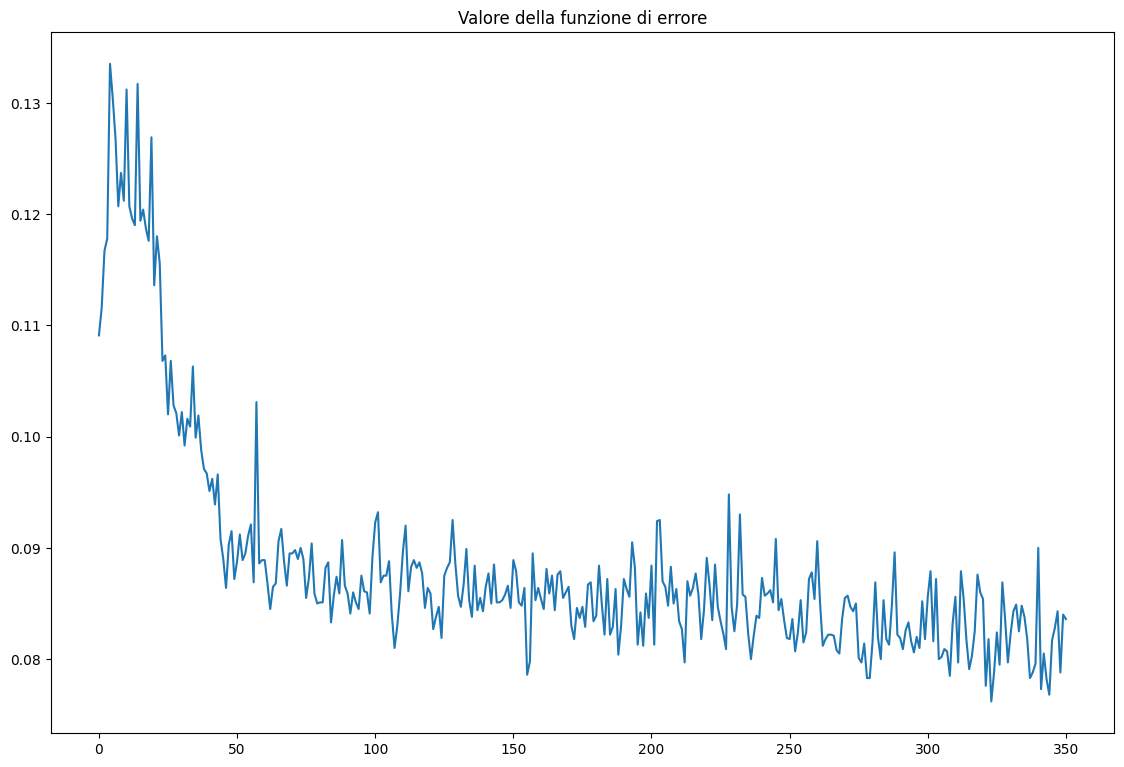

In [7]:
losses = np.array(losses)

axs = plt.subplot()
axs.figure.tight_layout()
axs.figure.set_size_inches(12,8)
axs.set_title('Valore della funzione di errore')
axs.plot(np.arange(0, len(losses)), losses)
axs.figure.savefig(fname="../figures/Rockpool-MNIST-training-graphics-lossess.eps", format='eps')
plt.show()

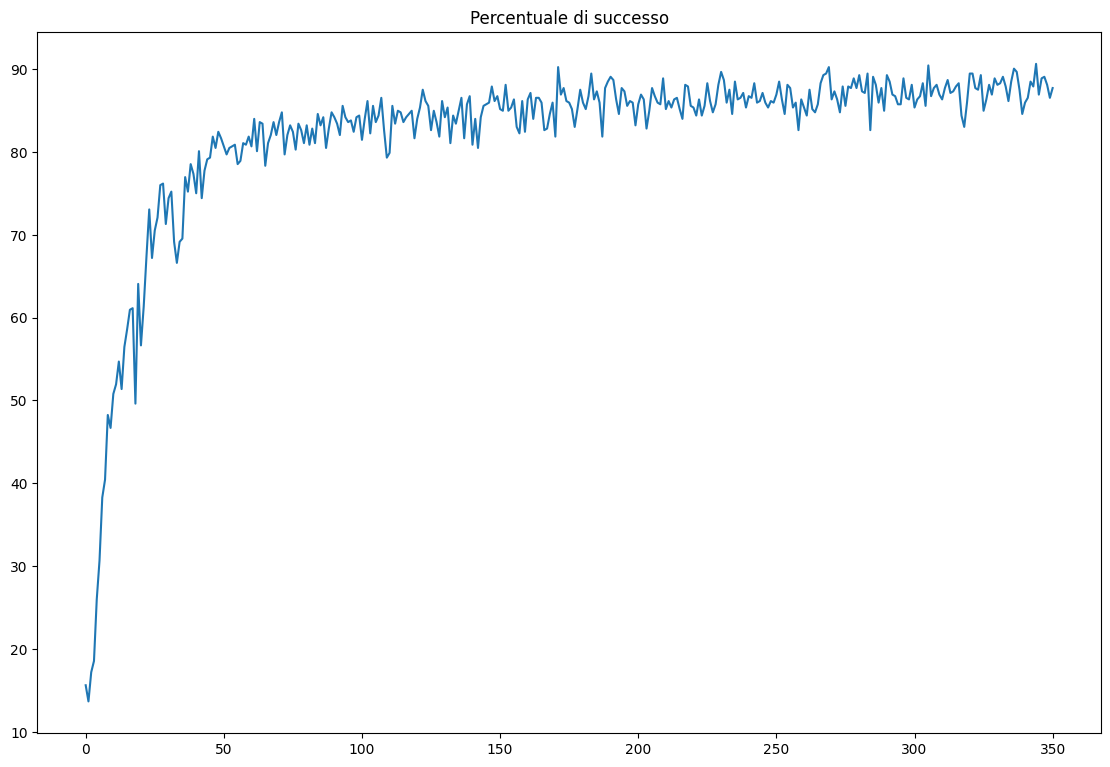

In [8]:
success = np.array(success)

axs = plt.subplot()
axs.figure.tight_layout()
axs.figure.set_size_inches(12,8)
axs.set_title('Percentuale di successo')
axs.plot(np.arange(0, len(success)), success*100)
axs.figure.savefig(fname="../figures/Rockpool-MNIST-training-graphics-success.eps", format='eps')
plt.show()